In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import astropy
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import WMAP9 as cosmo
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.gridspec import GridSpec
import linmix
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import mplpresets
import plotfunctions

In [2]:
fullcleardf = pd.read_csv('data/fullcleardf.csv')
sortedclearmergedf = pd.read_csv('data/sortedclearmergedf.csv')
barrodf =  pd.read_csv('data/barrodf.csv')
barromiddf =  pd.read_csv('data/barromiddf.csv')

limitdf = pd.read_csv('data/limitdf.csv')
limitbetanegdf = pd.read_csv('data/limitbetanegdf.csv')
limitpabdcdf = pd.read_csv('data/limitpabdcdf_avcor_csv.csv')
dclimitdf = pd.read_csv('data/dclimitdf.csv')
dclimitbetanegdf = pd.read_csv('data/dclimitbetanegdf.csv')


sortedpabdf = pd.read_csv('data/sortedpabdf.csv')
fullmergedf = pd.read_csv('data/fullmergePAB.csv')
fullmergebaddf = pd.read_csv('data/fullmergebadPAB.csv')
samplepabdcdf = pd.read_csv('data/samplepabdcdf_avcor.csv')

dustdf = pd.read_csv('data/dustdfPAB.csv')
dustcurvesdf = pd.read_csv('data/dustcurvesdf.csv')
attdf = pd.read_csv('data/attdfPAB.csv')

dcmergedf = pd.read_csv('data/dcmergePAB.csv')
dcsampledf = pd.read_csv('data/dcsampledf.csv')
morphdf = pd.read_csv('data/morphdf.csv')
dcmorphdf = pd.read_csv('data/dcmorphdf.csv')

fullmergedfsnr3 = pd.read_csv('data/fullmergedfsnr3.csv')
fullmergedfsnr3s = pd.read_csv('data/fullmergedfsnr3s.csv')
dcmergedfsnr3 = pd.read_csv('data/dcmergedfsnr3.csv')
dcmergedfsnr3s = pd.read_csv('data/dcmergedfsnr3s.csv')
dcsampledfsnr3 = pd.read_csv('data/dcsampledfsnr3.csv')
dcsampledfsnr3s = pd.read_csv('data/dcsampledfsnr3s.csv')
morphdfsnr3 = pd.read_csv('data/morphdfsnr3.csv')
morphdfsnr3s = pd.read_csv('data/morphdfsnr3s.csv')
dcmorphdfsnr3 = pd.read_csv('data/dcmorphdfsnr3.csv')
dcmorphdfsnr3s = pd.read_csv('data/dcmorphdfsnr3s.csv')

Text(0, 0.5, 'counts')

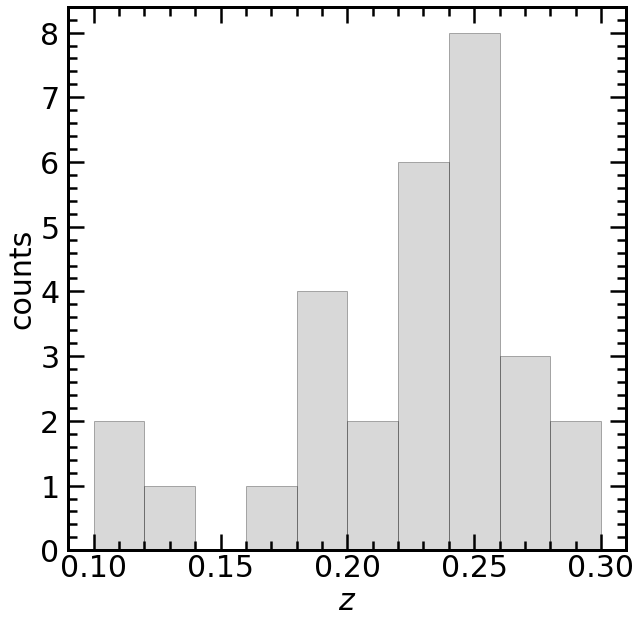

In [3]:
plt.figure(figsize=(10,10))
plt.hist(fullmergedf['Z_50'], bins=[.1, .12,.14, .16,.18, .2, .22,.24, .26,.28,.30], alpha=.3, color='gray', ec='black')
plt.xlabel('$z$')
plt.ylabel('counts')

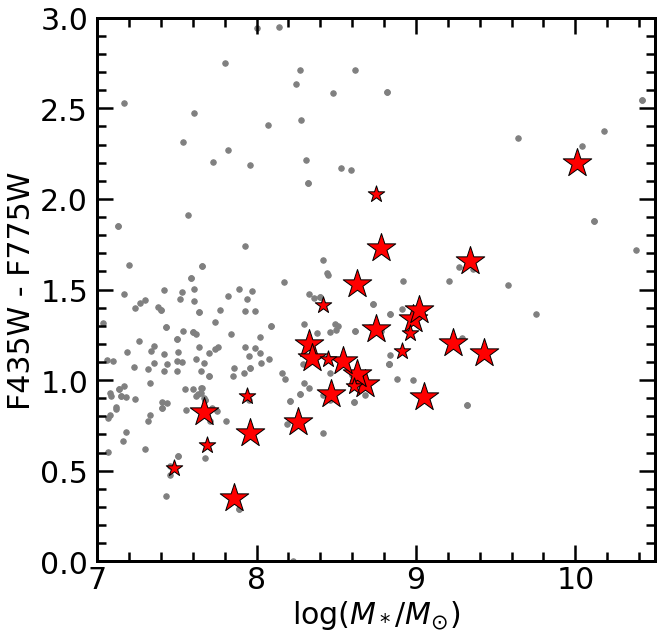

In [6]:
plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size': 30})
plt.scatter(fullcleardf['td_lmass'] , -2.5*np.log10(fullcleardf['ACS_F435W_FLUX']/fullcleardf['ACS_F775W_FLUX']) , s = 30 , c = 'gray')
plt.scatter(fullmergedfsnr3['td_lmass'] , -2.5*np.log10(fullmergedfsnr3['ACS_F435W_FLUX']/fullmergedfsnr3['ACS_F775W_FLUX']) , s = 900 , c='red', ec = 'black' , marker = '*')
plt.scatter(fullmergedfsnr3s['td_lmass'] , -2.5*np.log10(fullmergedfsnr3s['ACS_F435W_FLUX']/fullmergedfsnr3s['ACS_F775W_FLUX']) , s = 300 , c = 'red', ec='black' , marker = '*')
plt.ylabel("F435W - F775W")
plt.xlabel('log$(M_*/M_{\odot})$')
plt.axis([7 , 10.5  ,  0 , 3.0])
plt.show()

In [21]:
limitpabdcdf = limitdf[['ID' , 'td_lmass' ,  'PAB_SFR_EX2_LIMIT' , 'td_Av']]

In [22]:
limitpabdcdf.to_csv('limitpabdcdf.csv' , index = False)

In [24]:
samplepabdcdf = fullmergedf[['ID' , 'td_lmass' ,  'PAB_SFR_EX2' , 'td_Av']]

In [25]:
samplepabdcdf.to_csv('samplepabdcdf.csv' , index = False)

# **Plots for Referee Report Round 4**

In [62]:
barromassdf = barrodf.query('td_lmass > 7.25')
barromidmassdf = barromiddf.query('td_lmass > 7.25')
fullmergedf['SFR1'] = fullmergedf['ir_SFR-UV_corr']
fullmergedf['SFR2'] = fullmergedf['ir_SFR-IR']
tfullmergedf =  fullmergedf.query('SFR2 > 0')
barromassdf['SFR1'] = barromassdf['ir_SFR-UV_corr']
barromassdf['SFR2'] = barromassdf['ir_SFR-IR']
tbarroirmassdf =  barromassdf.query('SFR2 > 0')
barromidmassdf['SFR1'] = barromidmassdf['ir_SFR-UV_corr']
barromidmassdf['SFR2'] = barromidmassdf['ir_SFR-IR']
tbarromidmassdf =  barromidmassdf.query('SFR2 > 0')

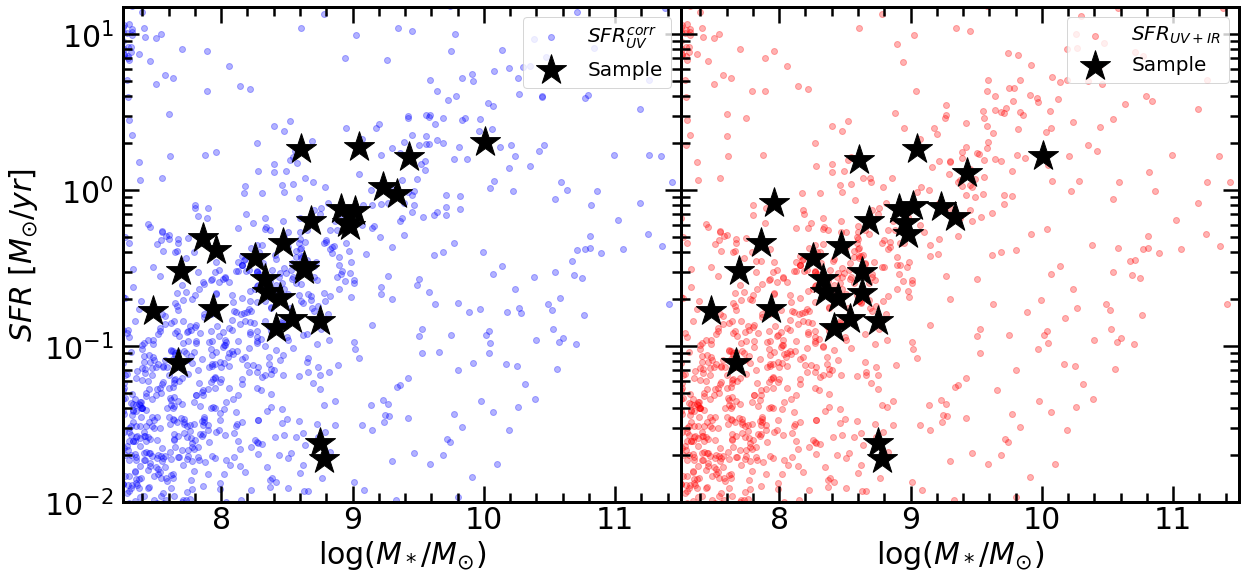

In [12]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.scatter(barrodf['td_lmass'] , barrodf['ir_SFR-UV_corr'] , color = 'blue' , alpha = .3 , label = '$SFR_{UV}^{corr}$')
ax0.scatter(fullmergedf['td_lmass'] , fullmergedf['ir_SFR-UV_corr'] , color = 'black' , marker = '*' , s = 1000, label = 'Sample')
ax0.set_ylabel(r'$SFR$ [$M_{\odot}/yr$]')
ax0.set_xlabel('log$(M_*/M_{\odot})$')
ax0.set_yscale('log')
ax0.axis([7.25 , 11.5 , .01 , 15])
ax0.legend(loc = 'upper right')
ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.scatter(barrodf['td_lmass'] , barrodf['ir_SFR-ladder_total'] , color = 'red' , alpha = .3 , label = '$SFR_{UV + IR}$')
ax1.scatter(fullmergedf['td_lmass'] , fullmergedf['ir_SFR-ladder_total'] , color = 'black' , marker = '*' , s = 1000, label = 'Sample')
ax1.set_xlabel('log$(M_*/M_{\odot})$')
ax1.set_yscale('log')
ax1.axis([7.25 , 11.5 , .01, 15])
ax1.tick_params(labelleft = False)
ax1.legend(loc = 'upper right')

plt.show()

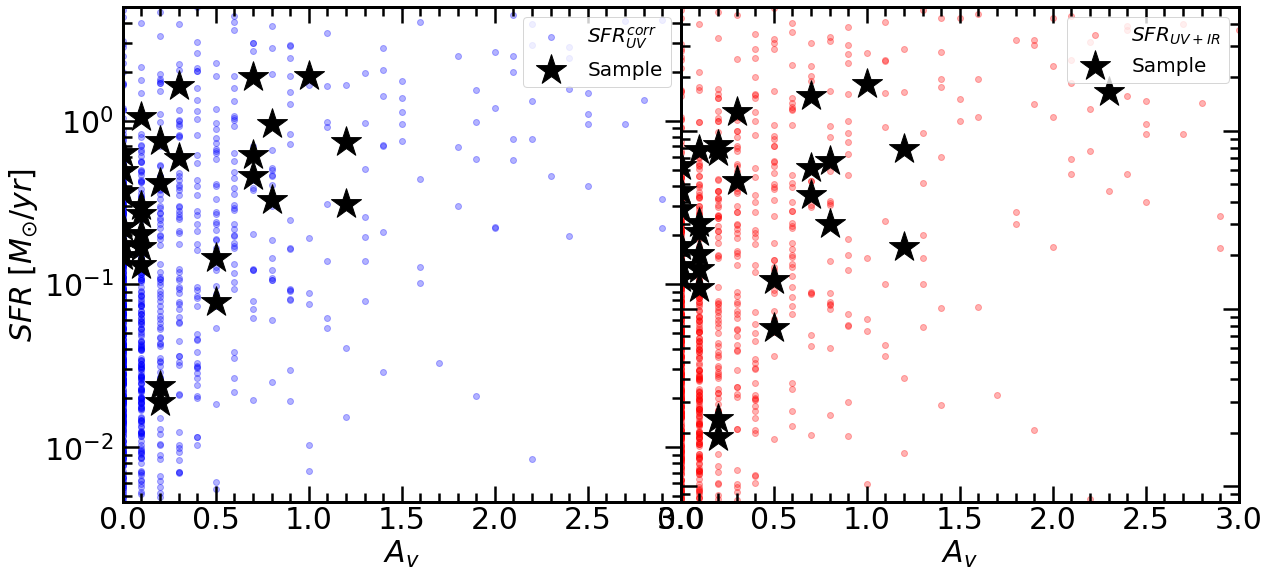

In [25]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.scatter(barromassdf['td_Av'] , barromassdf['ir_SFR-UV_corr'] , color = 'blue' , alpha = .3 , label = '$SFR_{UV}^{corr}$')
ax0.scatter(fullmergedf['td_Av'] , fullmergedf['ir_SFR-UV_corr'] , color = 'black' , marker = '*' , s = 1000, label = 'Sample')
ax0.set_ylabel(r'$SFR$ [$M_{\odot}/yr$]')
ax0.set_xlabel('$A_v$')
ax0.set_yscale('log')
ax0.axis([0 , 3 , 0 , 5])
ax0.legend(loc = 'upper right')
ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.scatter(barromassdf['td_Av'] , barromassdf['ir_SFR-ladder_total'] , color = 'red' , alpha = .3 , label = '$SFR_{UV + IR}$')
ax1.scatter(fullmergedf['td_Av'] , fullmergedf['ir_SFR-ladder_total'] , color = 'black' , marker = '*' , s = 1000, label = 'Sample')
ax1.set_xlabel('$A_v$')
ax1.set_yscale('log')
ax1.axis([0 , 3 , 0 , 5])
ax1.tick_params(labelleft = False)
ax1.legend(loc = 'upper right')

plt.show()

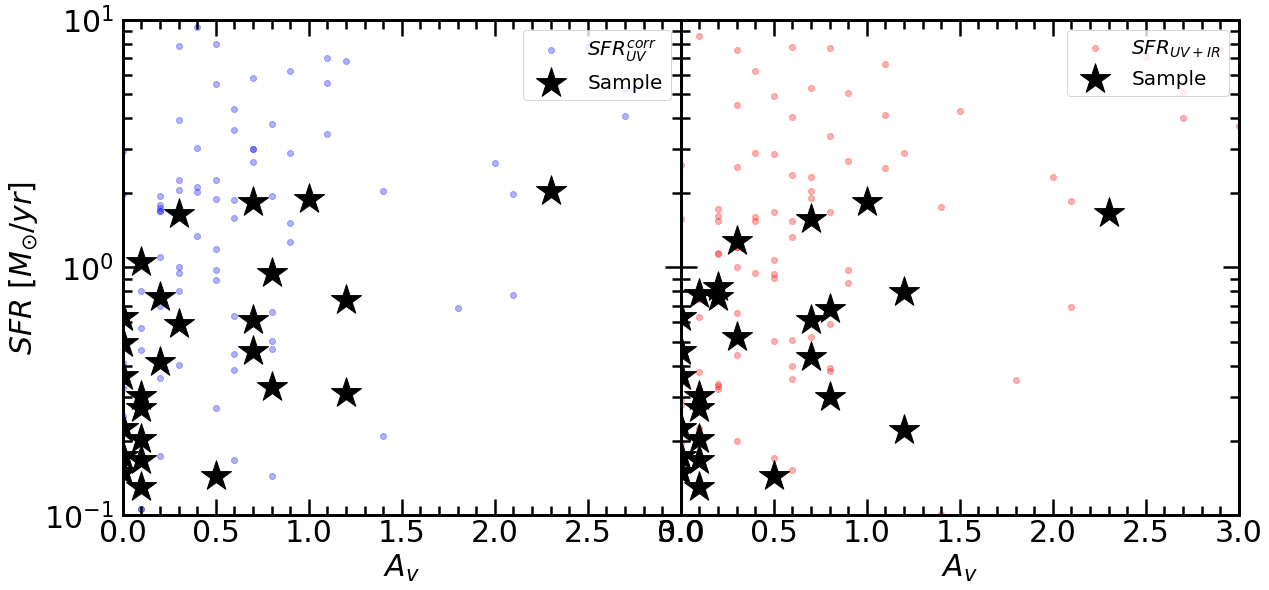

In [90]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.scatter(barroirmassdf['td_Av'] , barroirmassdf['ir_SFR-UV_corr'] , color = 'blue' , alpha = .3 , label = '$SFR_{UV}^{corr}$')
ax0.scatter(fullmergedf['td_Av'] , fullmergedf['ir_SFR-UV_corr'] , color = 'black' , marker = '*' , s = 1000, label = 'Sample')
ax0.set_ylabel(r'$SFR$ [$M_{\odot}/yr$]')
ax0.set_xlabel('$A_v$')
ax0.set_yscale('log')
ax0.axis([0 , 3 , 0.1 , 10])
ax0.legend(loc = 'upper right')
ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.scatter(barroirmassdf['td_Av'] , barroirmassdf['ir_SFR-ladder_total'] , color = 'red' , alpha = .3 , label = '$SFR_{UV + IR}$')
ax1.scatter(fullmergedf['td_Av'] , fullmergedf['ir_SFR-ladder_total'] , color = 'black' , marker = '*' , s = 1000, label = 'Sample')
ax1.set_xlabel('$A_v$')
ax1.set_yscale('log')
ax1.axis([0 , 3 , 0.1 , 10])
ax1.tick_params(labelleft = False)
ax1.legend(loc = 'upper right')

plt.show()

In [49]:
pd.set_option('display.max_rows', None)

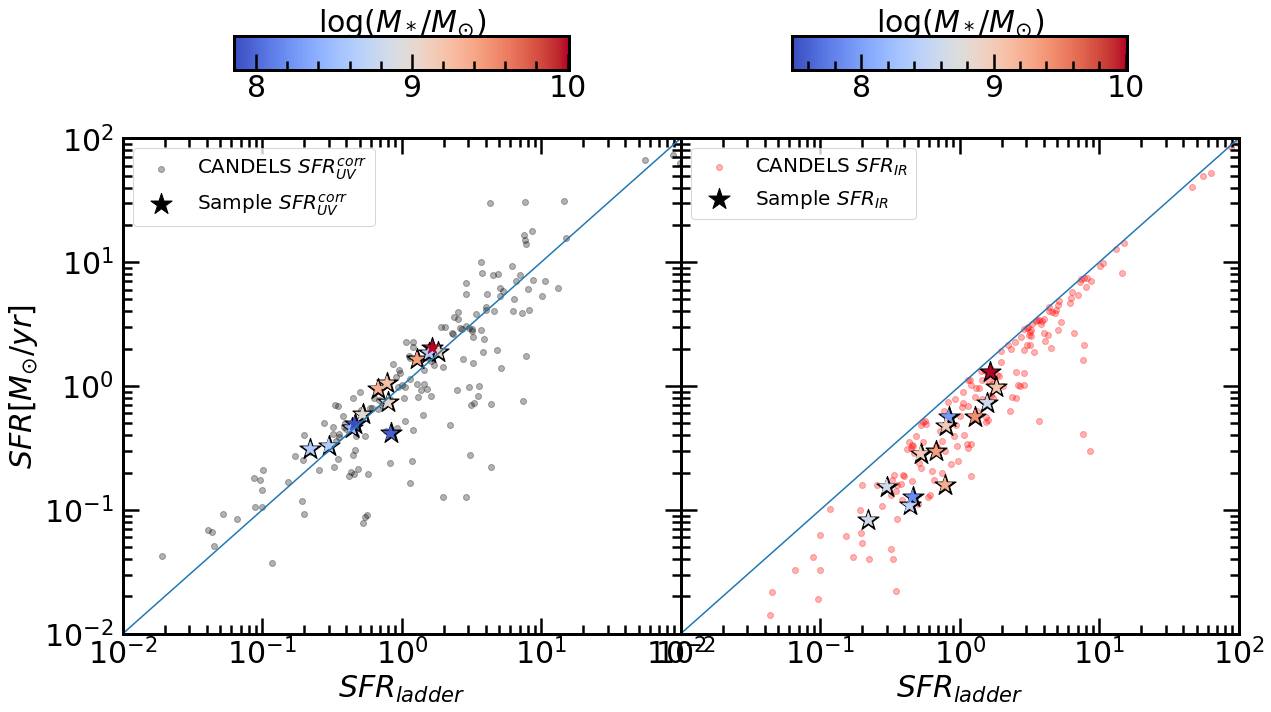

In [8]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.scatter(tbarroirmassdf['ir_SFR-ladder_total'] , tbarroirmassdf['ir_SFR-UV_corr'] , c = 'black' , alpha = .3 , label = 'CANDELS $SFR_{UV}^{corr}$')
# ax0.scatter(barroirmassdf['ir_SFR-ladder_total'] , barroirmassdf['ir_SFR-IR'] , c = 'red' , alpha = .3 , label = '3D-HST')
ax0.scatter(tfullmergedf['ir_SFR-ladder_total'] , tfullmergedf['ir_SFR-UV_corr'] , color = 'black' , marker = '*' , s = 500, label = 'Sample $SFR_{UV}^{corr}$')
y0 = ax0.scatter(tfullmergedf['ir_SFR-ladder_total'] , tfullmergedf['ir_SFR-UV_corr'] , c = tfullmergedf['td_lmass'] , cmap = 'coolwarm' , marker = '*' , s = 200)
ax0.set_ylabel('$SFR$' '[$M_{\odot}/yr$]')
ax0.set_xlabel('$SFR_{ladder}$')
ax0.legend()
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.axis([0.01 , 100 , 0.01 , 100])
ax0.plot([.01 , 100] , [.01 , 100])

ax1 = fig.add_subplot(gs[2:12, 5:10])
# ax0.scatter(barroirmassdf['ir_SFR-ladder_total'] , barroirmassdf['ir_SFR-UV_corr'] , c = 'black' , alpha = .3 , label = '3D-HST')
ax1.scatter(tbarroirmassdf['ir_SFR-ladder_total'] , tbarroirmassdf['ir_SFR-IR'] , c = 'red' , alpha = .3 , label = 'CANDELS $SFR_{IR}$')
ax1.scatter(fullmergedf['ir_SFR-ladder_total'] , fullmergedf['ir_SFR-IR'] , color = 'black' , marker = '*' , s = 500, label = 'Sample $SFR_{IR}$')
y1 = ax1.scatter(fullmergedf['ir_SFR-ladder_total'] , fullmergedf['ir_SFR-IR'] , c = fullmergedf['td_lmass'] , cmap = 'coolwarm' , marker = '*' , s = 200)
ax1.set_xlabel('$SFR_{ladder}$')
ax1.legend()
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.axis([0.01 , 100 , 0.01 , 100])
ax1.plot([.01 , 100] , [.01 , 100])
ax1.tick_params(labelleft = False)

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax3.xaxis.set_label_position('top')

ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax4.xaxis.set_label_position('top')

In [28]:
print(len(tbarroirmassdf[abs(np.log10(tbarroirmassdf['ir_SFR-UV_corr']) - np.log10(tbarroirmassdf['ir_SFR-ladder_total']) > 1)]))

6


In [29]:
print(len(tbarroirmassdf))

212


In [33]:
1-6/212

0.9716981132075472

In [22]:
print(len(tbarromidmassdf[abs(np.log10(tbarromidmassdf['ir_SFR-UV_corr']) - np.log10(tbarromidmassdf['ir_SFR-ladder_total']) > .5)]))

42


In [21]:
print(len(tbarromidmassdf))

1260


In [24]:
42/1260

0.03333333333333333

In [19]:
print(len(tbarromidmassdf[abs(np.log10(tbarromidmassdf['ir_SFR-UV_corr']) - np.log10(tbarromidmassdf['ir_SFR-ladder_total']) > 1)]))

7


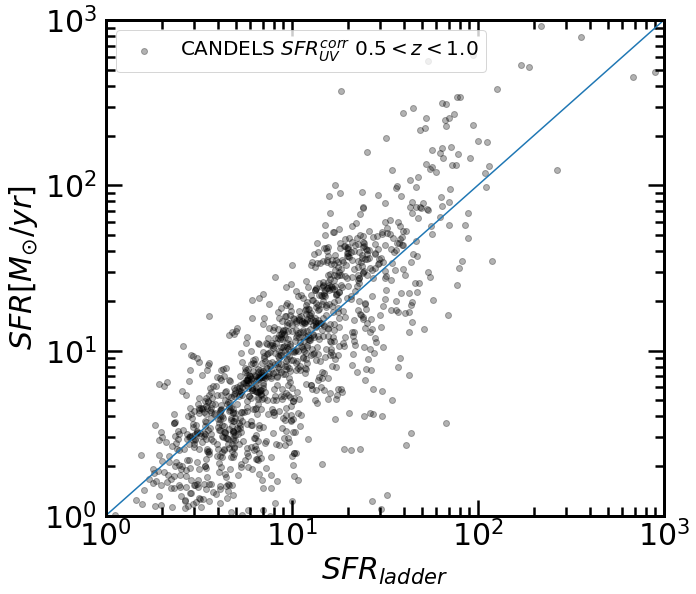

In [14]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.scatter(tbarromidmassdf['ir_SFR-ladder_total'] , tbarromidmassdf['ir_SFR-UV_corr'] , c = 'black' , alpha = .3 , label = 'CANDELS $SFR_{UV}^{corr}$ $0.5 < z < 1.0$')
# ax0.scatter(barroirmassdf['ir_SFR-ladder_total'] , barroirmassdf['ir_SFR-IR'] , c = 'red' , alpha = .3 , label = '3D-HST')
# ax0.scatter(tfullmergedf['ir_SFR-ladder_total'] , tfullmergedf['ir_SFR-UV_corr'] , color = 'black' , marker = '*' , s = 500, label = 'Sample $SFR_{UV}^{corr}$')
# y0 = ax0.scatter(tfullmergedf['ir_SFR-ladder_total'] , tfullmergedf['ir_SFR-UV_corr'] , c = tfullmergedf['td_lmass'] , cmap = 'coolwarm' , marker = '*' , s = 200)
ax0.set_ylabel('$SFR$' '[$M_{\odot}/yr$]')
ax0.set_xlabel('$SFR_{ladder}$')
ax0.legend()
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.axis([1 , 1000 , 1 , 1000])
ax0.plot([.1 , 1000] , [.1 , 1000])

# ax1 = fig.add_subplot(gs[2:12, 5:10])
# # ax0.scatter(barroirmassdf['ir_SFR-ladder_total'] , barroirmassdf['ir_SFR-UV_corr'] , c = 'black' , alpha = .3 , label = '3D-HST')
# ax1.scatter(barromidmassdf['ir_SFR-ladder_total'] , barromidmassdf['ir_SFR-IR'] , c = 'red' , alpha = .3 , label = 'CANDELS $SFR_{IR}$')
# # ax1.scatter(fullmergedf['ir_SFR-ladder_total'] , fullmergedf['ir_SFR-IR'] , color = 'black' , marker = '*' , s = 500, label = 'Sample $SFR_{IR}$')
# # y1 = ax1.scatter(fullmergedf['ir_SFR-ladder_total'] , fullmergedf['ir_SFR-IR'] , c = fullmergedf['td_lmass'] , cmap = 'coolwarm' , marker = '*' , s = 200)
# ax1.set_xlabel('$SFR_{ladder}$')
# ax1.legend()
# ax1.set_xscale('log')
# ax1.set_yscale('log')
# ax1.axis([0.01 , 100 , 0.01 , 100])
# ax1.plot([.01 , 100] , [.01 , 100])
# ax1.tick_params(labelleft = False)

# ax3 = fig.add_subplot(gs[0:1,1:4])
# fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
# ax3.xaxis.set_label_position('top')

# ax4 = fig.add_subplot(gs[0:1,6:9])
# fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
# ax4.xaxis.set_label_position('top')

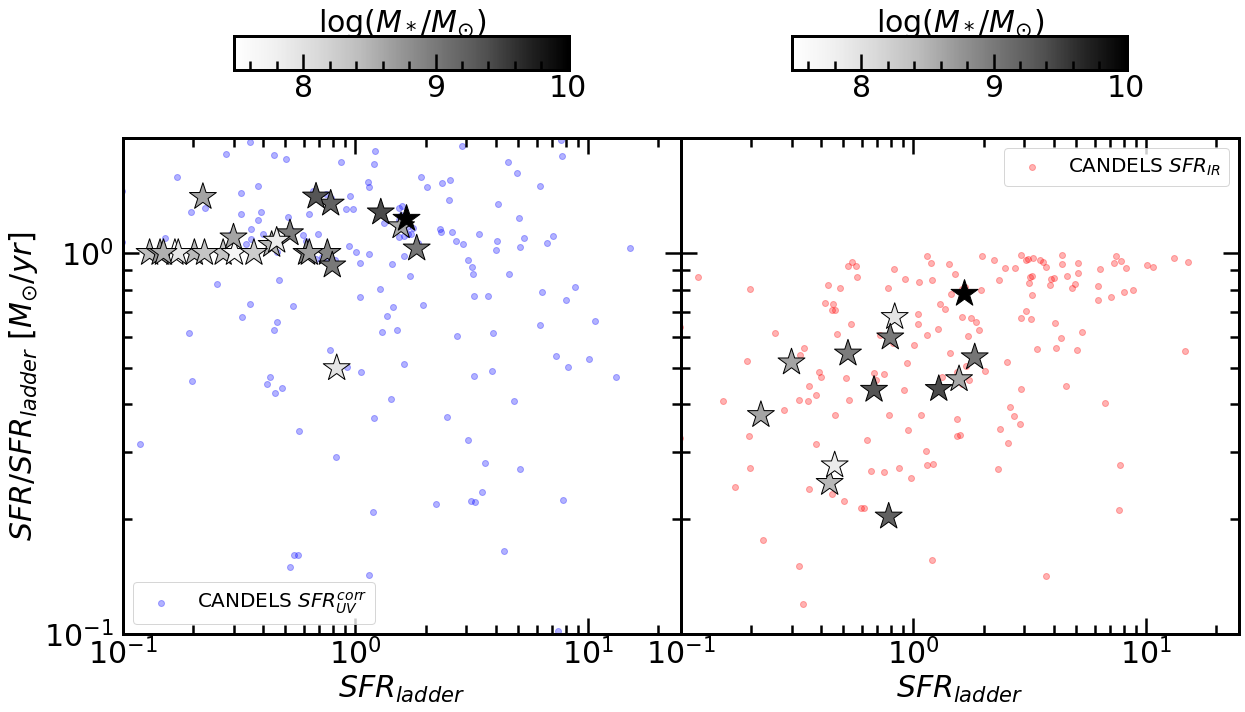

In [70]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.scatter(tbarroirmassdf['ir_SFR-ladder_total'] , tbarroirmassdf['ir_SFR-UV_corr']/tbarroirmassdf['ir_SFR-ladder_total'] , c = 'blue' , alpha = .3 , label = 'CANDELS $SFR_{UV}^{corr}$')
# ax0.scatter(barroirmassdf['ir_SFR-ladder_total'] , barroirmassdf['ir_SFR-IR'] , c = 'red' , alpha = .3 , label = 'CANDELS $SFR_{IR}$')
y0 = ax0.scatter(fullmergedf['ir_SFR-ladder_total'] , fullmergedf['ir_SFR-UV_corr']/fullmergedf['ir_SFR-ladder_total'] , c = fullmergedf['td_lmass'], ec='black' , cmap = 'Greys' , marker = '*' , s = 800)
ax0.set_ylabel('$SFR/SFR_{ladder}~$' '[$M_{\odot}/yr$]')
ax0.set_xlabel('$SFR_{ladder}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.axis([0.1 , 25 , 0.1 , 2])
# ax0.plot([.1 , 10] , [.1 , 1])
ax0.legend()

ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.scatter(tbarroirmassdf['ir_SFR-ladder_total'] , tbarroirmassdf['ir_SFR-IR']/tbarroirmassdf['ir_SFR-ladder_total'] , c = 'red' , alpha = .3 , label = 'CANDELS $SFR_{IR}$')
# ax0.scatter(barroirmassdf['ir_SFR-ladder_total'] , barroirmassdf['ir_SFR-IR'] , c = 'red' , alpha = .3 , label = 'CANDELS $SFR_{IR}$')
y1 = ax1.scatter(fullmergedf['ir_SFR-ladder_total'] , fullmergedf['ir_SFR-IR']/fullmergedf['ir_SFR-ladder_total'] , c = fullmergedf['td_lmass'], ec='black' , cmap = 'Greys' , marker = '*' , s = 800)
ax1.set_xlabel('$SFR_{ladder}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.axis([0.1 , 25 , 0.1 , 2])
# ax0.plot([.1 , 10] , [.1 , 1])
ax1.legend()
ax1.tick_params(labelleft = False)

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax3.xaxis.set_label_position('top')

ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax4.xaxis.set_label_position('top')

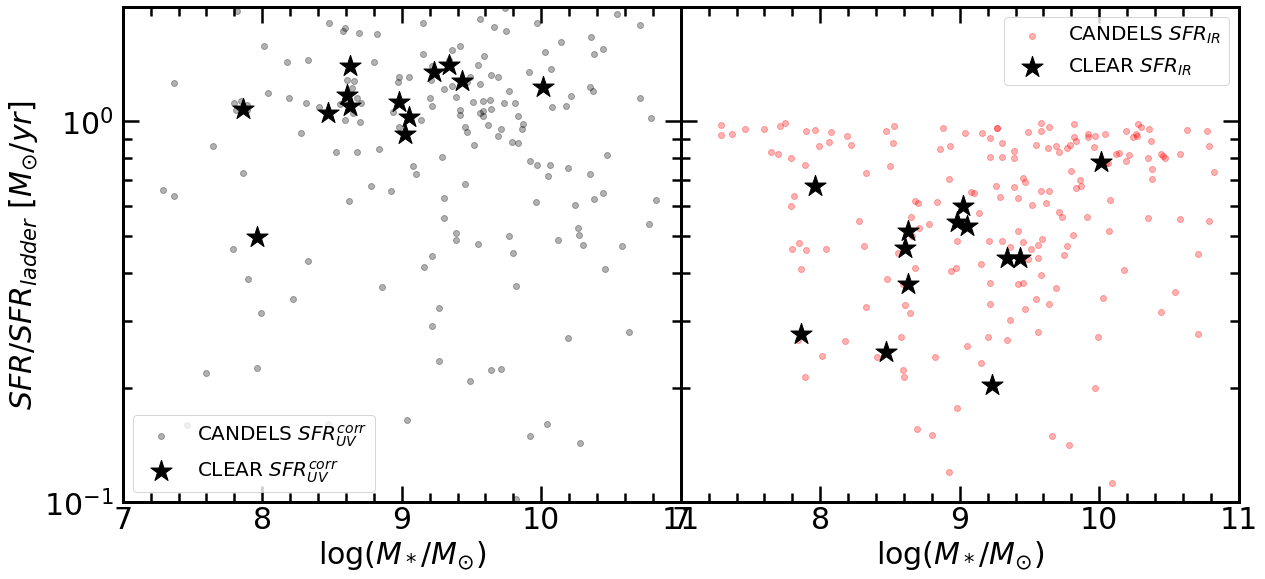

In [43]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.scatter(tbarroirmassdf['td_lmass'] , tbarroirmassdf['ir_SFR-UV_corr']/tbarroirmassdf['ir_SFR-ladder_total'] , c = 'black' , alpha = .3 , label = 'CANDELS $SFR_{UV}^{corr}$')
# ax0.scatter(barroirmassdf['ir_SFR-ladder_total'] , barroirmassdf['ir_SFR-IR'] , c = 'red' , alpha = .3 , label = 'CANDELS $SFR_{IR}$')
ax0.scatter(tfullmergedf['td_lmass'] , tfullmergedf['ir_SFR-UV_corr']/tfullmergedf['ir_SFR-ladder_total'] , color = 'black' , marker = '*' , s = 500, label = 'CLEAR $SFR_{UV}^{corr}$')
# y0 = ax0.scatter(tfullmergedf['td_lmass'] , tfullmergedf['ir_SFR-UV_corr']/tfullmergedf['ir_SFR-ladder_total'] , c = fullmergedf['td_lmass'] , cmap = 'coolwarm' , marker = '*' , s = 200)
ax0.set_ylabel('$SFR/SFR_{ladder}~$' '[$M_{\odot}/yr$]')
ax0.set_xlabel('log$(M_*/M_{\odot})$')
# ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.axis([7 , 11 , 0.1 , 2])
# ax0.plot([.1 , 10] , [.1 , 1])
ax0.legend()

ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.scatter(tbarroirmassdf['td_lmass'] , tbarroirmassdf['ir_SFR-IR']/tbarroirmassdf['ir_SFR-ladder_total'] , c = 'red' , alpha = .3 , label = 'CANDELS $SFR_{IR}$')
# ax0.scatter(barroirmassdf['ir_SFR-ladder_total'] , barroirmassdf['ir_SFR-IR'] , c = 'red' , alpha = .3 , label = 'CANDELS $SFR_{IR}$')
ax1.scatter(tfullmergedf['td_lmass'] , tfullmergedf['ir_SFR-IR']/tfullmergedf['ir_SFR-ladder_total'] , color = 'black' , marker = '*' , s = 500, label = 'CLEAR $SFR_{IR}$')
# y1 = ax1.scatter(fullmergedf['td_lmass'] , fullmergedf['ir_SFR-IR']/fullmergedf['ir_SFR-ladder_total'] , c = fullmergedf['td_lmass'] , cmap = 'coolwarm' , marker = '*' , s = 200)
ax1.set_xlabel('log$(M_*/M_{\odot})$')
# ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.axis([7 , 11 , 0.1 , 2])
# ax0.plot([.1 , 10] , [.1 , 1])
ax1.legend()
ax1.tick_params(labelleft = False)

# ax3 = fig.add_subplot(gs[0:1,1:4])
# fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
# ax3.xaxis.set_label_position('top')

# ax4 = fig.add_subplot(gs[0:1,6:9])
# fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
# ax4.xaxis.set_label_position('top')

(array([ 6., 20., 11., 24., 20., 28., 38., 26., 20., 11.]),
 array([ 7.29 ,  7.645,  8.   ,  8.355,  8.71 ,  9.065,  9.42 ,  9.775,
        10.13 , 10.485, 10.84 ]),
 <BarContainer object of 10 artists>)

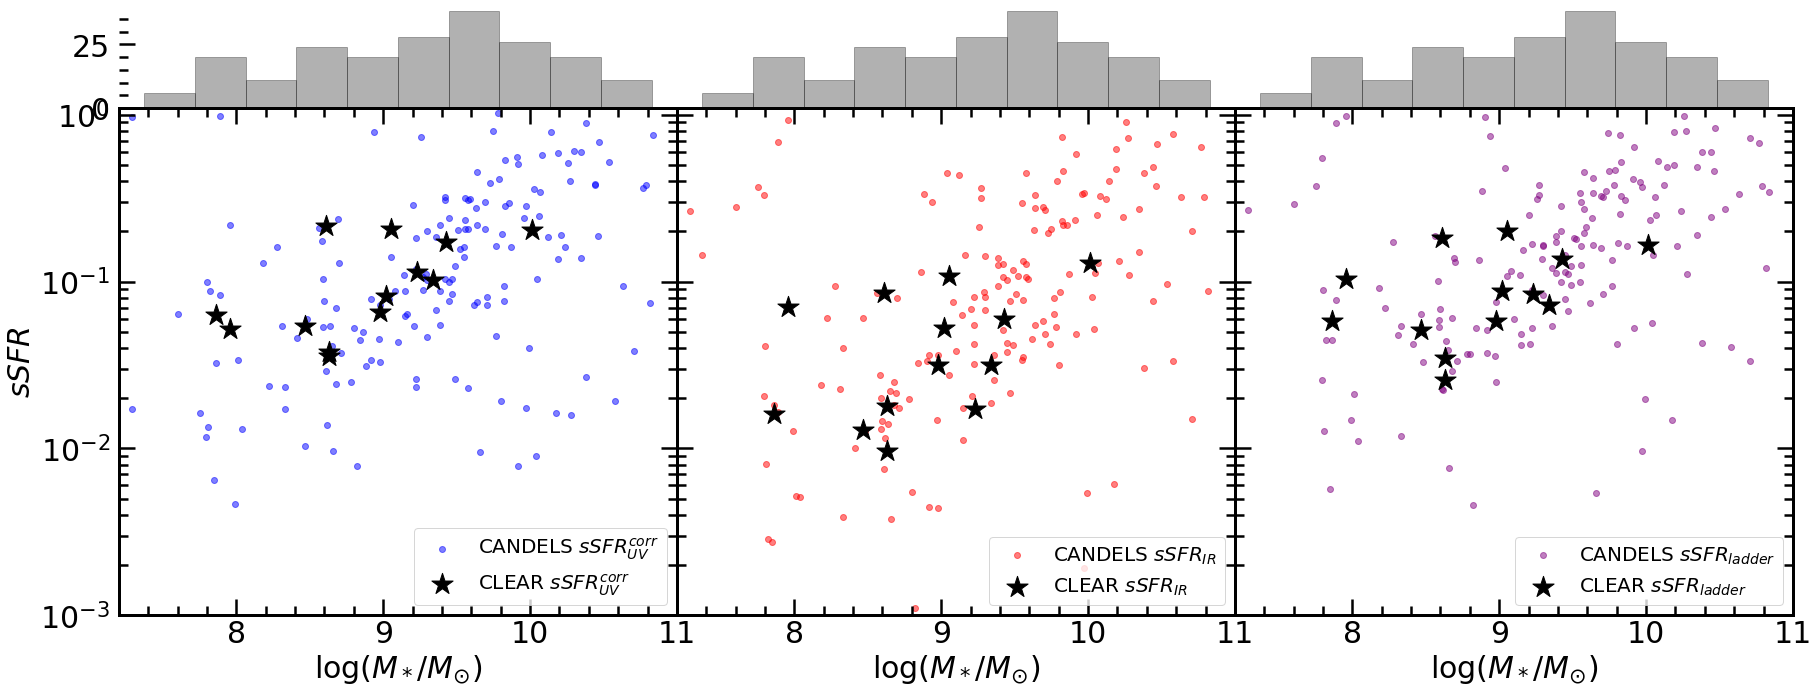

In [159]:
fig = plt.figure(figsize = (30 , 14))
gs = GridSpec(nrows=15, ncols=15)
gs.update(wspace = 0, hspace = 0)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.scatter(tbarroirmassdf['td_lmass'] , tbarroirmassdf['ir_SFR-UV_corr']/tbarroirmassdf['td_lmass'] , c = 'blue' , alpha = .5 , label = 'CANDELS $sSFR_{UV}^{corr}$')
# ax0.scatter(barroirmassdf['ir_SFR-ladder_total'] , barroirmassdf['ir_SFR-IR'] , c = 'red' , alpha = .3 , label = 'CANDELS $SFR_{IR}$')
ax0.scatter(tfullmergedf['td_lmass'] , tfullmergedf['ir_SFR-UV_corr']/tfullmergedf['td_lmass'] , color = 'black' , marker = '*' , s = 500, label = 'CLEAR $sSFR_{UV}^{corr}$')
# y0 = ax0.scatter(fullmergedf['ir_SFR-ladder_total'] , fullmergedf['ir_SFR-IR']/fullmergedf['td_lmass'] , c = fullmergedf['td_lmass'] , cmap = 'coolwarm' , marker = '*' , s = 200)
ax0.set_ylabel('$sSFR$' )
ax0.set_xlabel('log$(M_*/M_{\odot})$')

# ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.axis([7.2 , 11 , 0.001 , 1.1])
# ax0.plot([.1 , 10] , [.1 , 1])
ax0.legend(loc = 4)

ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.scatter(tbarroirmassdf['td_lmass'] , tbarroirmassdf['ir_SFR-IR']/tbarroirmassdf['td_lmass'] , c = 'red' , alpha = .5 , label = 'CANDELS $sSFR_{IR}$')
# ax0.scatter(barroirmassdf['ir_SFR-ladder_total'] , barroirmassdf['ir_SFR-IR'] , c = 'red' , alpha = .3 , label = 'CANDELS $SFR_{IR}$')
ax1.scatter(tfullmergedf['td_lmass'] , tfullmergedf['ir_SFR-IR']/tfullmergedf['td_lmass'] , color = 'black' , marker = '*' , s = 500, label = 'CLEAR $sSFR_{IR}$')
# y0 = ax0.scatter(fullmergedf['ir_SFR-ladder_total'] , fullmergedf['ir_SFR-IR']/fullmergedf['td_lmass'] , c = fullmergedf['td_lmass'] , cmap = 'coolwarm' , marker = '*' , s = 200)
ax1.set_xlabel('log$(M_*/M_{\odot})$')
# ax0.set_xscale('log')
ax1.set_yscale('log')
ax1.axis([7.2 , 11 , 0.001 , 1.1])
# ax0.plot([.1 , 10] , [.1 , 1])
ax1.legend(loc = 4)
ax1.tick_params(labelleft = False)

ax2 = fig.add_subplot(gs[2:12, 10:15])
ax2.scatter(tbarroirmassdf['td_lmass'] , tbarroirmassdf['ir_SFR-ladder_total']/tbarroirmassdf['td_lmass'] , c = 'purple' , alpha = .5 , label = 'CANDELS $sSFR_{ladder}$')
# ax0.scatter(barroirmassdf['ir_SFR-ladder_total'] , barroirmassdf['ir_SFR-IR'] , c = 'red' , alpha = .3 , label = 'CANDELS $SFR_{IR}$')
ax2.scatter(tfullmergedf['td_lmass'] , tfullmergedf['ir_SFR-ladder_total']/tfullmergedf['td_lmass'] , color = 'black' , marker = '*' , s = 500, label = 'CLEAR $sSFR_{ladder}$')
# y0 = ax0.scatter(fullmergedf['ir_SFR-ladder_total'] , fullmergedf['ir_SFR-IR']/fullmergedf['td_lmass'] , c = fullmergedf['td_lmass'] , cmap = 'coolwarm' , marker = '*' , s = 200)
ax2.set_xlabel('log$(M_*/M_{\odot})$')
# ax0.set_xscale('log')
ax2.set_yscale('log')
ax2.axis([7.2 , 11 , 0.001 , 1.1])
# ax0.plot([.1 , 10] , [.1 , 1])
ax2.legend(loc = 4)
ax2.tick_params(labelleft = False)

ax3 = fig.add_subplot(gs[0:2, 0:5], frameon=False)
ax3.tick_params(right = False ,
                labelbottom = False, bottom = False, labeltop = False, top = False, which = 'both')
ax3.hist(tbarroirmassdf['td_lmass'][tbarroirmassdf['td_lmass'] < 11], bins = 10, color='black', edgecolor='black', alpha = .3)

ax4 = fig.add_subplot(gs[0:2, 5:10], frameon=False)
ax4.tick_params( left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False, labeltop = False, top = False, which = 'both')
ax4.hist(tbarroirmassdf['td_lmass'][tbarroirmassdf['td_lmass'] < 11], bins = 10, color='black', edgecolor='black', alpha = .3)

ax5 = fig.add_subplot(gs[0:2, 10:15], frameon=False)
ax5.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False, labeltop = False, top = False, which = 'both')
ax5.hist(tbarroirmassdf['td_lmass'][tbarroirmassdf['td_lmass'] < 11], bins = 10, color='black', edgecolor='black', alpha = .3)

In [5]:
import plotfunctions

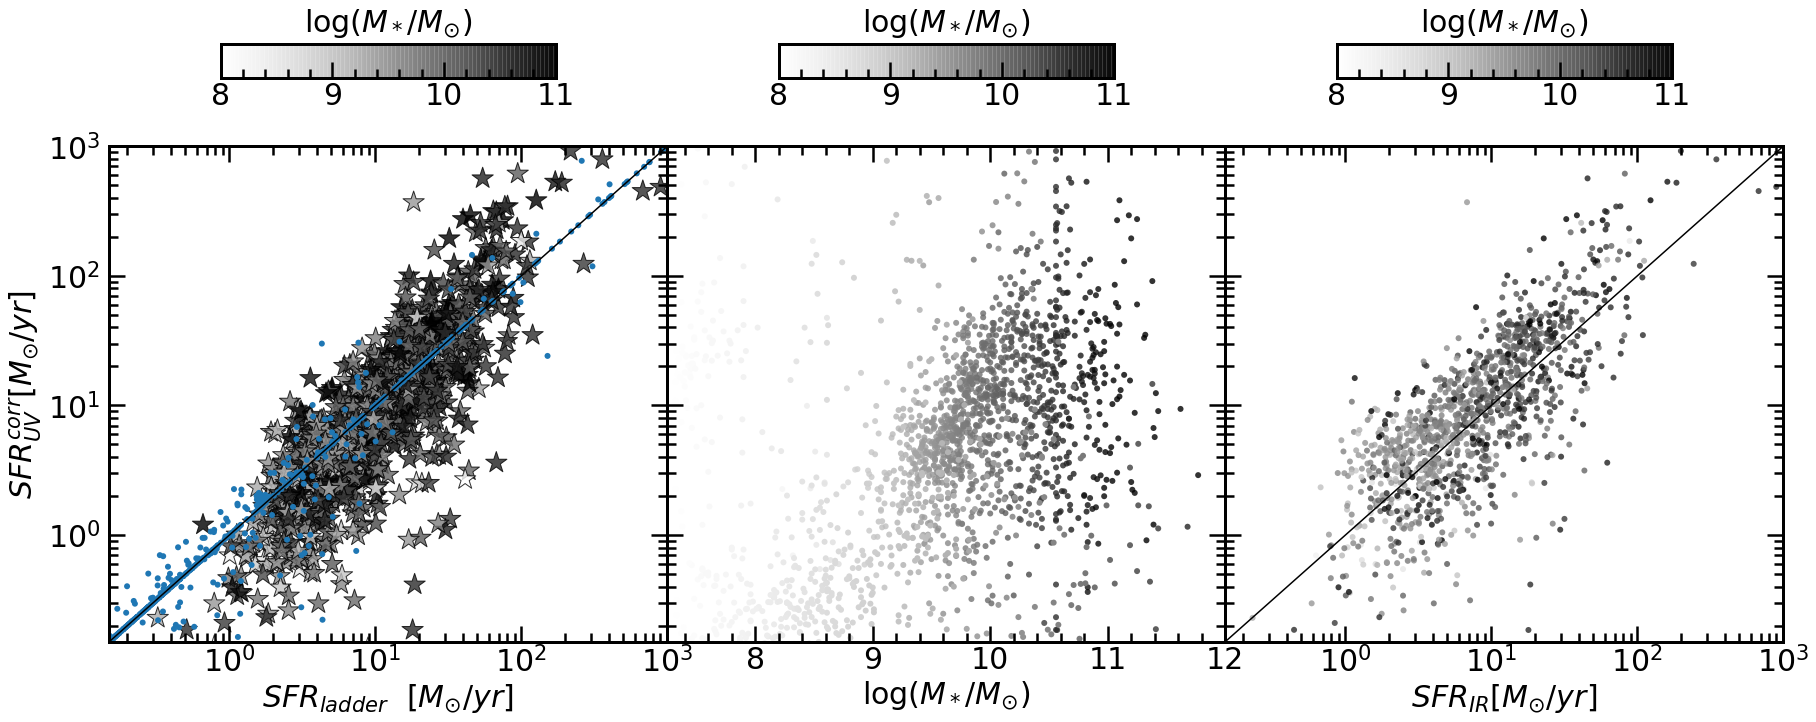

In [8]:
plotfunctions.panelfig(npanels=3,
           x0=tbarromidmassdf['ir_SFR-ladder_total'] , y0=tbarromidmassdf['ir_SFR-UV_corr'],marker0='*', s0=500,
           x0_1=barromassdf['ir_SFR-ladder_total'] , y0_1=barromassdf['ir_SFR-UV_corr'],
           xmin0=.15, xmax0=1000, ymin0=.15, ymax0=1000, 
           c0=tbarromidmassdf['td_lmass'], ec0='black', alpha0=.8, 
           xlabel0 = '$SFR_{ladder}~$ [$M_{\odot}/yr$]', ylabel0='$SFR_{UV}^{corr}$' '[$M_{\odot}/yr$]', xscale0='log', yscale0='log', 
           line0=[.15,1000,.15,1000], 
           cmap0='Greys', vmin0=8, vmax0=11, cbarlabel0='log$(M_*/M_{\odot})$', show_cbar0=True,
           
           x1=tbarromidmassdf['td_lmass'] , y1=tbarromidmassdf['ir_SFR-UV_corr'], c1=tbarromidmassdf['td_lmass'], alpha1=.8,cmap1='Greys',
           x1_1=barromassdf['td_lmass'] , y1_1=barromassdf['ir_SFR-UV_corr'], c1_1=barromassdf['td_lmass'],cmap1_1='Greys',
           xmin1=7.25, xmax1=12, ymin1=.15, ymax1=1000, 
            
           xlabel1 ='log$(M_*/M_{\odot})$', yscale1='log',  
           vmin1=8, vmax1=11, cbarlabel1='log$(M_*/M_{\odot})$', show_cbar1=True,
           x2=tbarromidmassdf['ir_SFR-IR'] , y2=tbarromidmassdf['ir_SFR-UV_corr'], 
           xmin2=.15, xmax2=1000, ymin2=.15, ymax2=1000, 
           c2=tbarromidmassdf['td_lmass'], alpha2=.8, 
           line2=[.1,1000,.1,1000],
           xlabel2 ='$SFR_{IR}$' '[$M_{\odot}/yr$]', xscale2='log', yscale2='log',  
           cmap2='Greys', vmin2=8, vmax2=11, cbarlabel2='log$(M_*/M_{\odot})$', show_cbar2=True)

In [80]:
fullmergedf['Z_50'].median()

0.2343339459532293

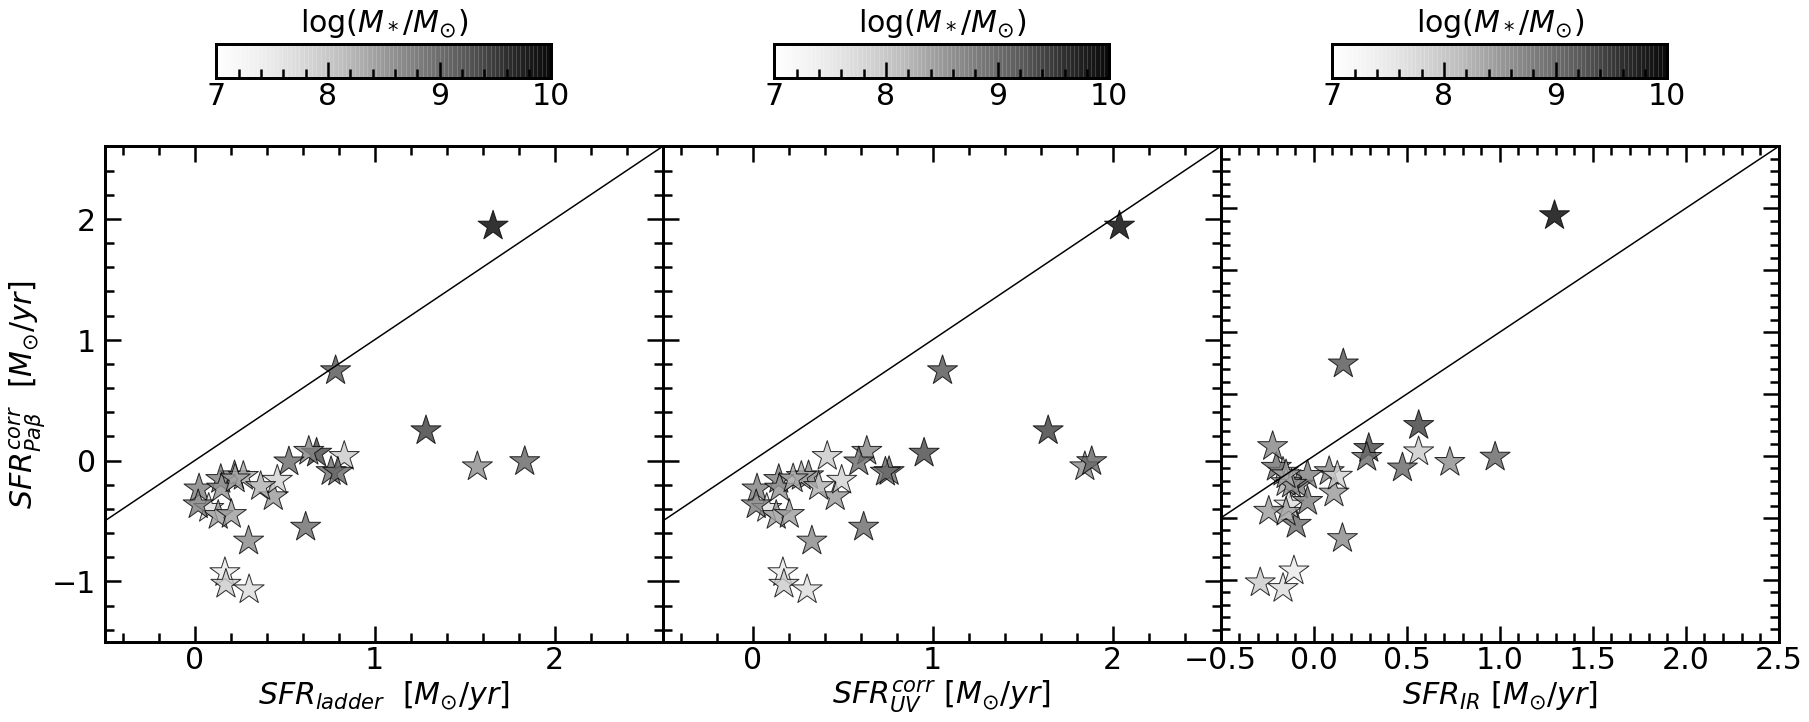

In [74]:
plotfunctions.panelfig(npanels=3,
           x0=dcsampledf['ir_SFR-ladder_total'] , y0=dcsampledf['PAB_SFR']*dcsampledf['calzfactor'],marker0='*', s0=1000,
           xmin0=-.5, xmax0=2.6, ymin0=-1.5, ymax0=2.6, 
           c0=fullmergedf['td_lmass'], ec0='black', alpha0=.8, 
           xlabel0 = '$SFR_{ladder}~$ [$M_{\odot}/yr$]', ylabel0=r'$SFR_{Pa\beta}^{corr}~$ [$M_{\odot}/yr$]',  
           line0=[-2.6,2.6,-2.6,2.6], 
           cmap0='Greys', vmin0=7, vmax0=10, cbarlabel0='log$(M_*/M_{\odot})$', show_cbar0=True,
           
           x1=dcsampledf['ir_SFR-UV_corr'] , y1=dcsampledf['PAB_SFR']*dcsampledf['calzfactor'],marker1='*', s1=1000,
           xmin1=-.5, xmax1=2.6, ymin1=-1.5, ymax1=2.6, 
           c1=fullmergedf['td_lmass'], ec1='black', alpha1=.8,
           line1=[-2.6,2.6,-2.6,2.6],
           xlabel1='$SFR_{UV}^{corr}~$' '[$M_{\odot}/yr$]',  
           cmap1='Greys', vmin1=7, vmax1=10, cbarlabel1='log$(M_*/M_{\odot})$', show_cbar1=True,
         
           x2=fullmergedf['ir_SFR-IR'] , y2=fullmergedf['PAB_SFR']*dcsampledf['calzfactor'],marker2='*', s2=1000, 
           xmin2=-.5, xmax2=2.5, ymin2=-1.5, ymax2=2.5, 
           c2=fullmergedf['td_lmass'], ec2='black', alpha2=.8, 
           line2=[-2.6,2.6,-2.6,2.6],
           xlabel2 ='$SFR_{IR}~$' '[$M_{\odot}/yr$]',  
           cmap2='Greys', vmin2=7, vmax2=10, cbarlabel2='log$(M_*/M_{\odot})$', show_cbar2=True)

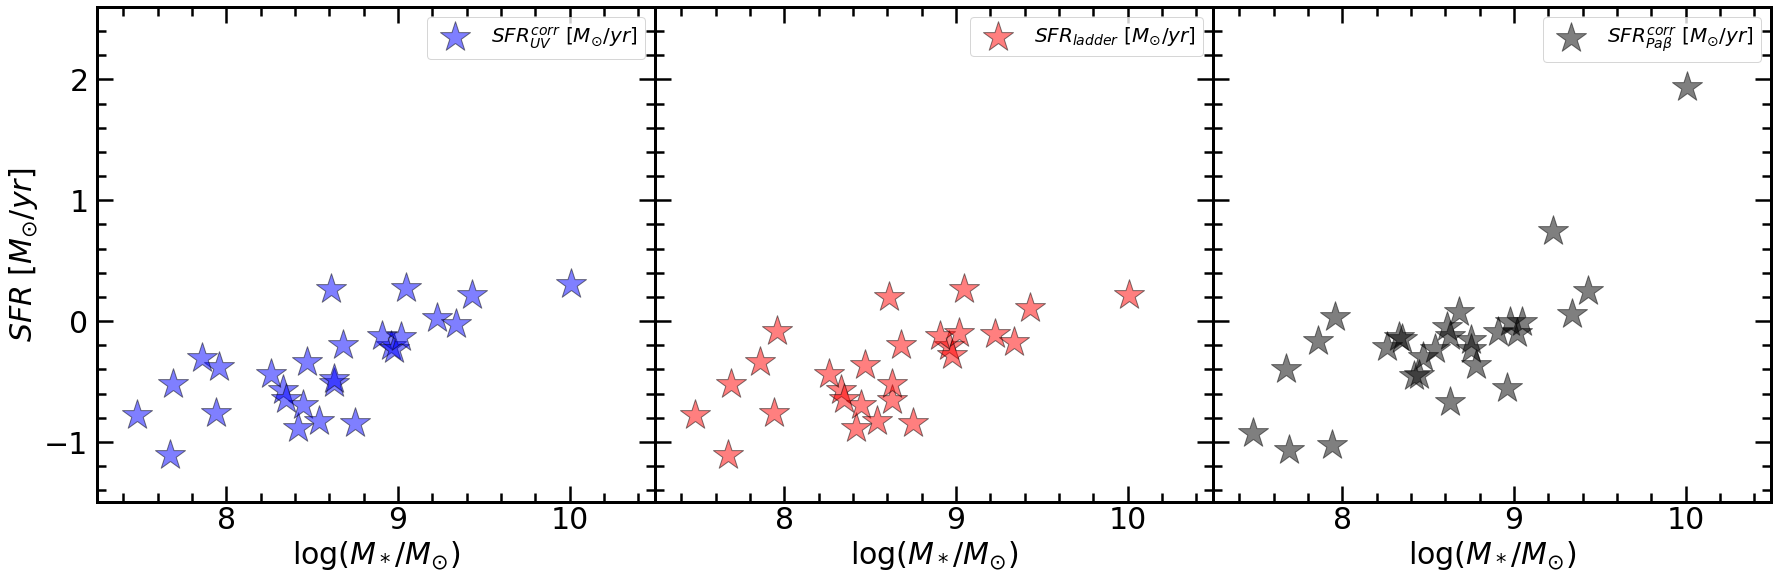

In [315]:
plotfunctions.panelfig(npanels=3,
           x0=dcsampledf['td_lmass'] , y0=np.log10(dcsampledf['ir_SFR-UV_corr']),marker0='*', s0=1000,
           xmin0=7.25, xmax0=10.5, ymin0=-1.5, ymax0=2.6, 
           c0='blue', ec0='black', alpha0=.5, 
           xlabel0= 'log$(M_*/M_{\odot})$', label0=r'$SFR_{UV}^{corr}$ [$M_{\odot}/yr$]', ylabel0=r'$SFR~[M_{\odot}/yr]$',
#            line0=[-2.6,2.6,-2.6,2.6], 
           cmap0='Greys', vmin0=7, vmax0=10, cbarlabel0='log$(M_*/M_{\odot})$', show_cbar0=False,
           
           x1=dcsampledf['td_lmass'] , y1=np.log10(dcsampledf['ir_SFR-ladder_total']),marker1='*', s1=1000,
           xmin1=7.25, xmax1=10.5, ymin1=-1.5, ymax1=2.6, 
           c1='red', ec1='black', alpha1=.5,
#            line1=[-2.6,2.6,-2.6,2.6],
           xlabel1='log$(M_*/M_{\odot})$', label1=r'$SFR_{ladder}~[M_{\odot}/yr]$',
           cmap1='Greys', vmin1=7, vmax1=10, cbarlabel1='log$(M_*/M_{\odot})$', show_cbar1=False,
         
           x2=fullmergedf['td_lmass'] , y2=fullmergedf['PAB_SFR']*dcsampledf['calzfactor'],marker2='*', s2=1000, 
           xmin2=7.25, xmax2=10.5, ymin2=-1.5, ymax2=2.6, 
           c2='black', ec2='black', alpha2=.5, 
#            line2=[-2.6,2.6,-2.6,2.6],
           xlabel2='log$(M_*/M_{\odot})$', label2=r'$SFR_{Pa\beta}^{corr}~[M_{\odot}/yr]$',
           cmap2='Greys', vmin2=7, vmax2=10, cbarlabel2='log$(M_*/M_{\odot})$', show_cbar2=False)

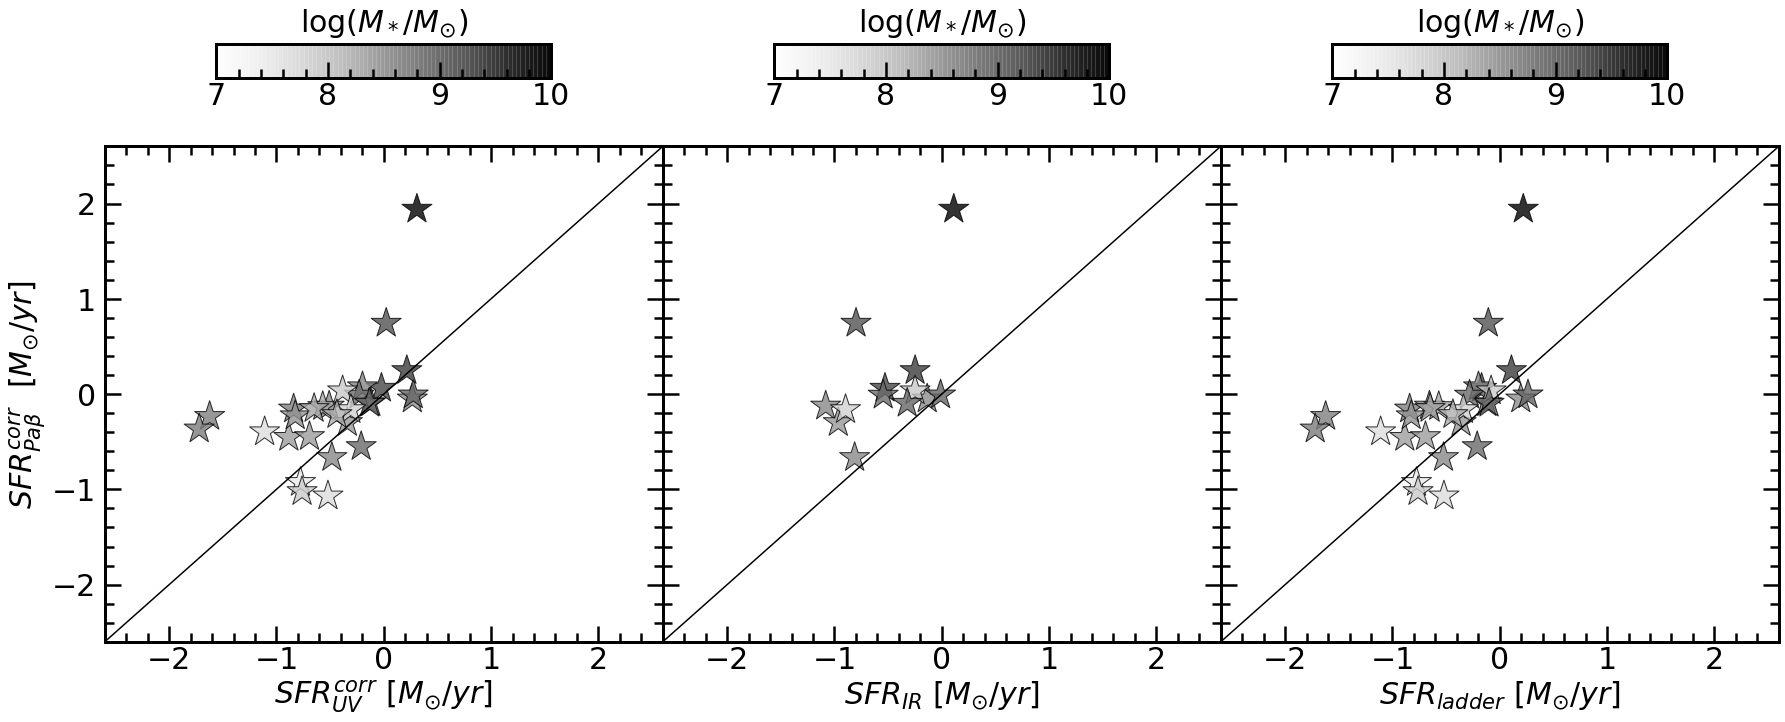

In [319]:
plotfunctions.panelfig(npanels=3,
           x0=np.log10(dcsampledf['ir_SFR-UV_corr']) , y0=dcsampledf['PAB_SFR']*dcsampledf['calzfactor'],marker0='*', s0=1000,
           xmin0=-2.6, xmax0=2.6, ymin0=-2.6, ymax0=2.6, 
           c0=fullmergedf['td_lmass'], ec0='black', alpha0=.8, 
           xlabel0 = '$SFR_{UV}^{corr}~$[$M_{\odot}/yr$]', ylabel0=r'$SFR_{Pa\beta}^{corr}~$ [$M_{\odot}/yr$]',  
           line0=[-2.6,2.6,-2.6,2.6], 
           cmap0='Greys', vmin0=7, vmax0=10, cbarlabel0='log$(M_*/M_{\odot})$', show_cbar0=True,
           
           x1=np.log10(dcsampledf['ir_SFR-IR']) , y1=dcsampledf['PAB_SFR']*dcsampledf['calzfactor'],marker1='*', s1=1000,
           xmin1=-2.6, xmax1=2.6, ymin1=-2.6, ymax1=2.6, 
           c1=fullmergedf['td_lmass'], ec1='black', alpha1=.8,
           line1=[-2.6,2.6,-2.6,2.6],
           xlabel1='$SFR_{IR}~$''[$M_{\odot}/yr$]',  
           cmap1='Greys', vmin1=7, vmax1=10, cbarlabel1='log$(M_*/M_{\odot})$', show_cbar1=True,
         
           x2=np.log10(fullmergedf['ir_SFR-ladder_total']) , y2=fullmergedf['PAB_SFR']*dcsampledf['calzfactor'],marker2='*', s2=1000, 
           xmin2=-2.6, xmax2=2.6, ymin2=-2.6, ymax2=2.6, 
           c2=fullmergedf['td_lmass'], ec2='black', alpha2=.8, 
           line2=[-2.6,2.6,-2.6,2.6],
           xlabel2 ='$SFR_{ladder}~$''[$M_{\odot}/yr$]',  
           cmap2='Greys', vmin2=7, vmax2=10, cbarlabel2='log$(M_*/M_{\odot})$', show_cbar2=True)

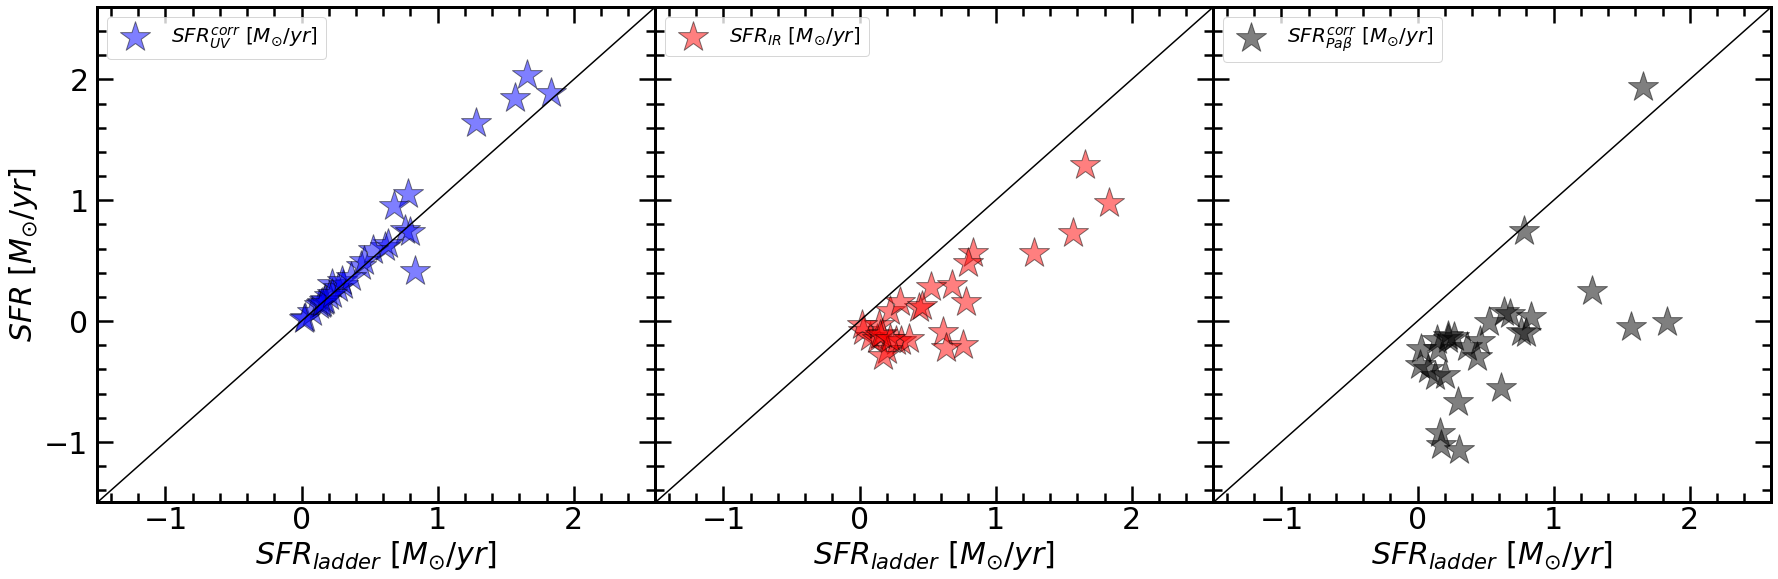

In [186]:
plotfunctions.panelfig(npanels=3,
           x0=dcsampledf['ir_SFR-ladder_total'] , y0=dcsampledf['ir_SFR-UV_corr'],marker0='*', s0=1000,
           xmin0=-1.5, xmax0=2.6, ymin0=-1.5, ymax0=2.6, 
           c0='blue', ec0='black', alpha0=.5, 
           xlabel0= r'$SFR_{ladder}~[M_{\odot}/yr]$', label0=r'$SFR_{UV}^{corr}$ [$M_{\odot}/yr$]', ylabel0=r'$SFR~[M_{\odot}/yr]$',
           line0=[-2.6,2.6,-2.6,2.6], 
           cmap0='Greys', vmin0=7, vmax0=10, cbarlabel0='log$(M_*/M_{\odot})$', show_cbar0=False,
           
           x1=dcsampledf['ir_SFR-ladder_total'] , y1=dcsampledf['ir_SFR-IR'],marker1='*', s1=1000,
           xmin1=-1.5, xmax1=2.6, ymin1=-1.5, ymax1=2.6, 
           c1='red', ec1='black', alpha1=.5,
           line1=[-2.6,2.6,-2.6,2.6],
           xlabel1=r'$SFR_{ladder}~[M_{\odot}/yr]$', label1=r'$SFR_{IR}~[M_{\odot}/yr]$',
           cmap1='Greys', vmin1=7, vmax1=10, cbarlabel1='log$(M_*/M_{\odot})$', show_cbar1=False,
         
           x2=fullmergedf['ir_SFR-ladder_total'] , y2=fullmergedf['PAB_SFR']*dcsampledf['calzfactor'],marker2='*', s2=1000, 
           xmin2=-1.5, xmax2=2.6, ymin2=-1.5, ymax2=2.6, 
           c2='black', ec2='black', alpha2=.5, 
           line2=[-2.6,2.6,-2.6,2.6],
           xlabel2=r'$SFR_{ladder}~[M_{\odot}/yr]$', label2=r'$SFR_{Pa\beta}^{corr}~[M_{\odot}/yr]$',
           cmap2='Greys', vmin2=7, vmax2=10, cbarlabel2='log$(M_*/M_{\odot})$', show_cbar2=False)

In [29]:
fullmergedfsnr3=fullmergedf.query('PAB_FLUX/PAB_FLUX_ERR > 3')
fullmergedfsnr3s=fullmergedf.query('PAB_FLUX/PAB_FLUX_ERR < 3')
fullmergedfsnr3.to_csv('fullmergedfsnr3.csv', index=False)
fullmergedfsnr3s.to_csv('fullmergedfsnr3s.csv', index=False)

morphdfsnr3=morphdf.query('PAB_FLUX/PAB_FLUX_ERR > 3')
morphdfsnr3s=morphdf.query('PAB_FLUX/PAB_FLUX_ERR < 3')
morphdfsnr3.to_csv('morphdfsnr3.csv', index=False)
morphdfsnr3s.to_csv('morphdfsnr3s.csv', index=False)

dcmorphdfsnr3=dcmorphdf.query('PAB_FLUX_x/PAB_FLUX_ERR_x > 3')
dcmorphdfsnr3s=dcmorphdf.query('PAB_FLUX_x/PAB_FLUX_ERR_x < 3')
dcmorphdfsnr3.to_csv('dcmorphdfsnr3.csv', index=False)
dcmorphdfsnr3s.to_csv('dcmorphdfsnr3s.csv', index=False)

dcmergedfsnr3=dcmergedf.query('PAB_FLUX/PAB_FLUX_ERR > 3')
dcmergedfsnr3s=dcmergedf.query('PAB_FLUX/PAB_FLUX_ERR < 3')
dcmergedfsnr3.to_csv('dcmergedfsnr3.csv', index=False)
dcmergedfsnr3s.to_csv('dcmergedfsnr3s.csv', index=False)

dcsampledfsnr3=dcsampledf.query('PAB_FLUX/PAB_FLUX_ERR > 3')
dcsampledfsnr3s=dcsampledf.query('PAB_FLUX/PAB_FLUX_ERR < 3')
dcsampledfsnr3.to_csv('dcsampledfsnr3.csv', index=False)
dcsampledfsnr3s.to_csv('dcsampledfsnr3s.csv', index=False)

In [31]:
display(dcmorphdfsnr3)

,FIELD_x,ID_x,RA_x_x,DEC_x_x,Z_50_x,Z_ERR_x,PAB_FLUX_x,PAB_FLUX_ERR_x,OBS_PAB_x,id3DHST_x,...,PAB_SFR_LL_y,PAB_SFR_EX2_LL_y,PAB_SFR_LL_1SIGMA_y,PAB_SFR_EX_LL_1SIGMA_y,id,sfrratio,sfrratio_calz,calzfactor,sfrratio_mw,mwfactor
1,GN2,19221,189.201266,62.240702,0.139631,0.002470,19.445505,2.126779,14610.064284,19221,...,-1.794139,-2.069013,-1.981966,-2.256839,19221,-0.28,-0.04,1.74,-0.06,1.67
2,GN2,15610,189.212722,62.222423,0.199242,0.007588,14.520550,2.317139,15374.278308,15610,...,-1.453302,-1.668474,-1.641128,-1.856300,15610,-0.01,0.07,1.18,0.06,1.17
5,GN3,34456,189.339813,62.324291,0.211290,0.010113,27.507629,2.862229,15695.781592,34456,...,-1.396135,-1.705231,-1.583962,-1.893057,34456,0.23,0.79,3.57,0.75,3.27
6,GN3,34157,189.206826,62.321196,0.245119,0.014142,28.282754,2.688524,15962.430241,34157,...,-1.250334,-1.273352,-1.438161,-1.461178,34157,0.68,0.70,1.06,0.70,1.05
7,GN3,33397,189.175470,62.314347,0.245053,0.010841,6.159068,1.908827,15961.576268,33397,...,-1.250603,-1.229179,-1.438429,-1.417006,33397,0.06,0.25,1.56,0.24,1.51
8,GN3,33511,189.234550,62.314768,0.256401,0.009254,4.371808,1.187729,16107.064381,33511,...,-1.205809,-0.697171,-1.393636,-0.884998,33511,0.44,0.73,1.94,0.71,1.86
9,GN3,34368,189.338526,62.320968,0.228424,0.005207,4.132371,0.995737,15748.400334,34368,...,-1.319804,-0.980695,-1.507630,-1.168521,34368,0.14,0.30,1.47,0.29,1.43
10,GN3,34077,189.210930,62.317701,0.248121,0.013336,4.116922,0.936845,16000.907312,34077,...,-1.238309,-0.669684,-1.426135,-0.857510,34077,0.45,0.47,1.06,0.47,1.05
13,GN5,33249,189.207722,62.311096,0.234334,0.127937,3.122788,0.794631,15824.161187,33249,...,-1.294695,-0.184642,-1.482522,-0.372468,33249,0.81,0.93,1.32,0.92,1.29
14,GS2,45518,53.154087,-27.697930,0.281881,0.005265,4.871179,1.059491,16433.719756,45518,...,-1.111521,-0.913312,-1.299348,-1.101138,45518,0.27,0.27,1.00,0.27,1.00
